<a href="https://colab.research.google.com/github/aranyamisra/college-coursework/blob/main/air-pollution-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Pollution in India (2020 - 2023)

## Objective

This case study explores air pollution trends in major Indian cities using data from 2020 to 2023. The goal is to analyze how key pollutants like PM2.5, PM10, NO₂, and SO₂ have varied over time and across locations, with a focus on identifying seasonal patterns, city-wise pollution levels, and the impact of events such as COVID-19 lockdowns. Through visualizations and statistical analysis, the study aims to uncover meaningful insights into air quality fluctuations and inter-pollutant relationships, contributing to a better understanding of urban environmental health in India.

## Dataset Used

**Air Pollution Data of India (2020-2023):**

https://www.kaggle.com/datasets/seshupavan/air-pollution-data-of-india-2020-2023

**Features:** City, Date, aqi, CO, NO, NO2, O3, SO2, PM2.5, PM10, NH3

**Cities:** Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

## Audience

The audience for this case study includes environmental researchers, data analysts, policymakers, urban planners, and public health professionals who are interested in understanding air pollution trends in India. Additionally, it can benefit students and educators working on data science projects related to environmental monitoring and those involved in climate change studies or sustainable development initiatives.

## Reading the dataset

In [ ]:
import pandas as pd

data = pd.read_csv('air_pollution_data.csv')
print("Dataset Preview:")
print(data.head())

Dataset Preview:
        city        date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad  30-11-2020    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad  01-12-2020    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad  02-12-2020    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad  03-12-2020    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad  04-12-2020    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm10    nh3  
0   72.13   8.36  
1  154.53  27.36  
2  172.63  28.12  
3  202.15  36.48  
4  205.80  40.53  


## Clean and Preprocess the Data

In [ ]:
print("Initial Data Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23504 entries, 0 to 23503
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    23504 non-null  object 
 1   date    23504 non-null  object 
 2   aqi     23504 non-null  int64  
 3   co      23504 non-null  float64
 4   no      23504 non-null  float64
 5   no2     23504 non-null  float64
 6   o3      23504 non-null  float64
 7   so2     23504 non-null  float64
 8   pm2_5   23504 non-null  float64
 9   pm10    23504 non-null  float64
 10  nh3     23504 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.0+ MB
None

Missing Values:
 city     0
date     0
aqi      0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


## Data Summary

In [ ]:
print("Data Summary:")
print(data.describe())

Data Summary:
                aqi            co           no           no2            o3  \
count  23504.000000  23504.000000  23504.00000  23504.000000  23504.000000   
mean       3.920354   1113.224543      6.00554     25.044104     35.059777   
std        1.415490   1401.770372     24.50272     25.839242     31.901760   
min        1.000000    173.570000      0.00000      0.310000      0.000000   
25%        3.000000    447.270000      0.00000      8.740000      7.870000   
50%        5.000000    700.950000      0.00000     16.450000     28.250000   
75%        5.000000   1188.280000      0.27000     32.220000     54.360000   
max        5.000000  23071.290000    457.76000    331.760000    406.270000   

                so2         pm2_5          pm10           nh3  
count  23504.000000  23504.000000  23504.000000  23504.000000  
mean      15.971449     98.598310    121.848091     12.060212  
std       23.943464    135.572391    160.429589     17.544759  
min        0.190000      0.

## Exploratory Data Analysis (EDA)

### Visualise Data Distributions

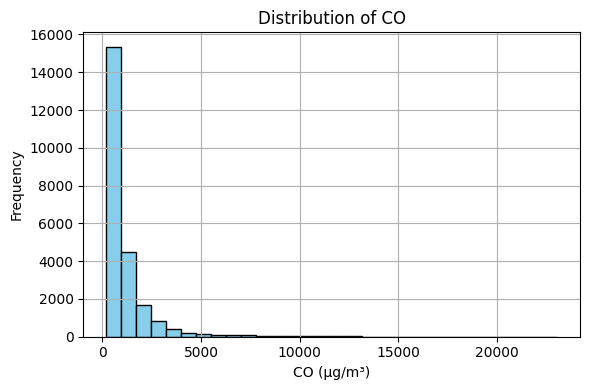

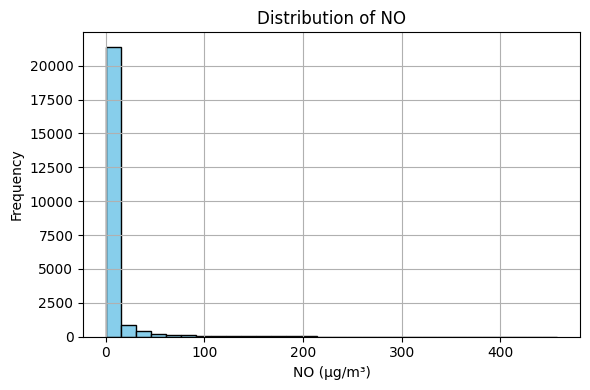

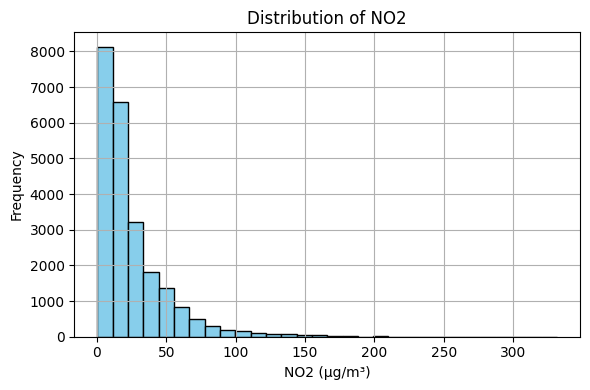

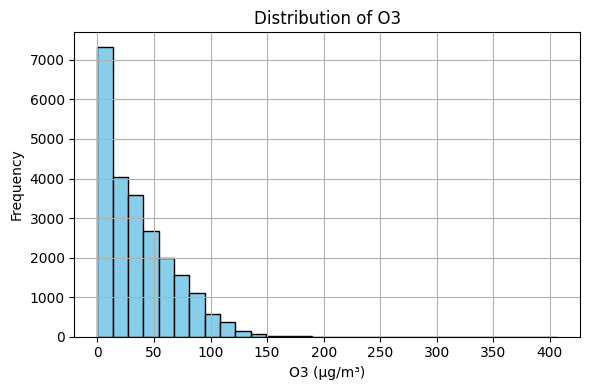

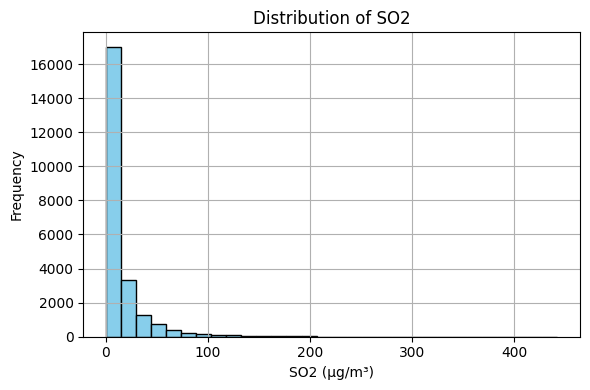

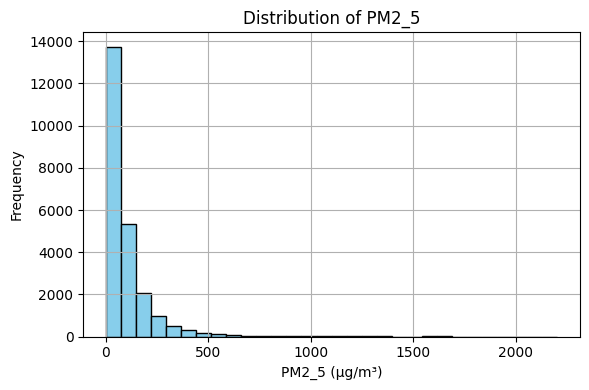

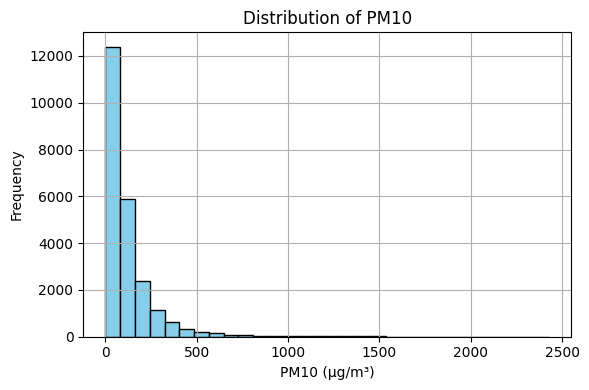

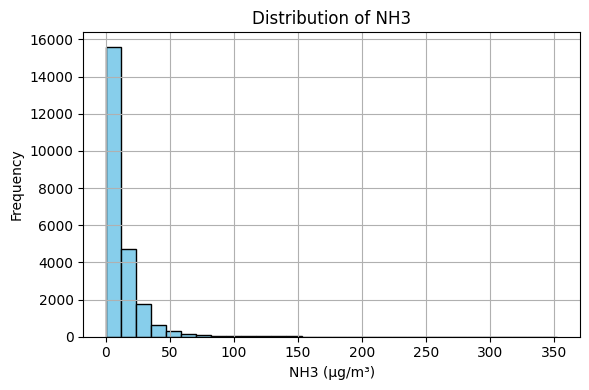

In [ ]:
import matplotlib.pyplot as plt

# Histograms for Each Pollutant
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
for col in pollutants:
    plt.figure(figsize=(6, 4))
    plt.hist(data[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col.upper()}')
    plt.xlabel(f'{col.upper()} (µg/m³)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

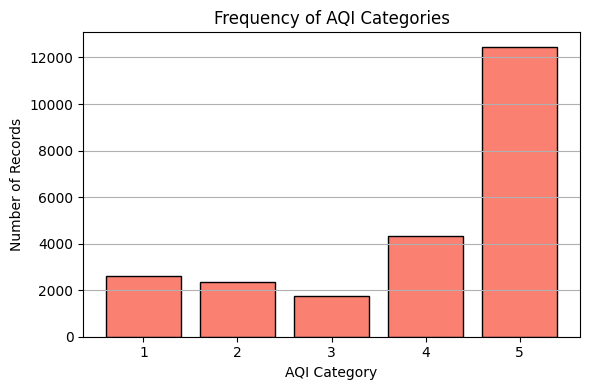

In [ ]:
# AQI Frequency
aqi_counts = data['aqi'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(aqi_counts.index, aqi_counts.values, color='salmon', edgecolor='black')
plt.title("Frequency of AQI Categories")
plt.xlabel("AQI Category")
plt.ylabel("Number of Records")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Scatter Plot

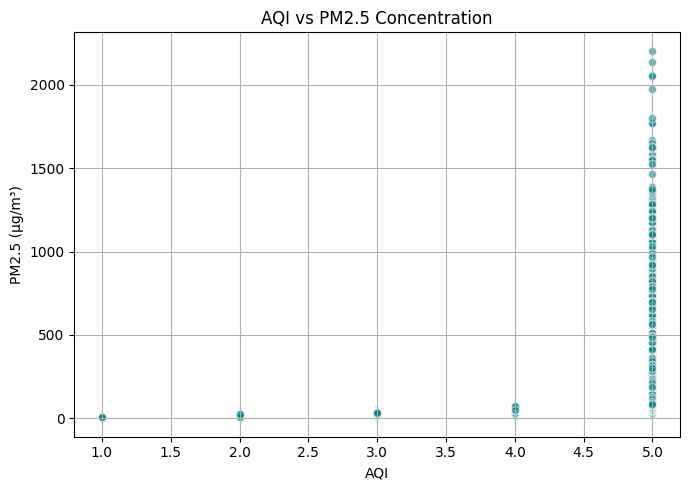

In [ ]:
# AQI vs. CO
''' This scatter plot is one of the most critical because PM2.5 (fine particulate matter) is often a major
contributor to poor air quality and is strongly correlated with higher AQI values (i.e., worse air quality). '''

plt.figure(figsize=(7, 5))
plt.scatter(data['aqi'], data['pm2_5'], alpha=0.6, color='teal', edgecolors='w')
plt.title('AQI vs PM2.5 Concentration')
plt.xlabel('AQI')
plt.ylabel('PM2.5 (µg/m³)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Correlation Matrix

The relationship between various pollutants and the AQI (Air Quality Index).

In [ ]:
# Show correlation between numeric features
correlation_matrix = data.corr(numeric_only=True)

print("Correlation Matrix:\n")
print(correlation_matrix)

Correlation Matrix:

            aqi        co        no       no2        o3       so2     pm2_5  \
aqi    1.000000  0.377355  0.173879  0.440113  0.085184  0.303629  0.456002   
co     0.377355  1.000000  0.843799  0.805820 -0.313232  0.631510  0.929881   
no     0.173879  0.843799  1.000000  0.499226 -0.267879  0.532777  0.719160   
no2    0.440113  0.805820  0.499226  1.000000 -0.380578  0.708760  0.737977   
o3     0.085184 -0.313232 -0.267879 -0.380578  1.000000 -0.163729 -0.191523   
so2    0.303629  0.631510  0.532777  0.708760 -0.163729  1.000000  0.552935   
pm2_5  0.456002  0.929881  0.719160  0.737977 -0.191523  0.552935  1.000000   
pm10   0.467122  0.935345  0.718655  0.755135 -0.203824  0.562396  0.990648   
nh3    0.361675  0.603286  0.416600  0.608555 -0.192751  0.468437  0.558785   

           pm10       nh3  
aqi    0.467122  0.361675  
co     0.935345  0.603286  
no     0.718655  0.416600  
no2    0.755135  0.608555  
o3    -0.203824 -0.192751  
so2    0.562396  0.4

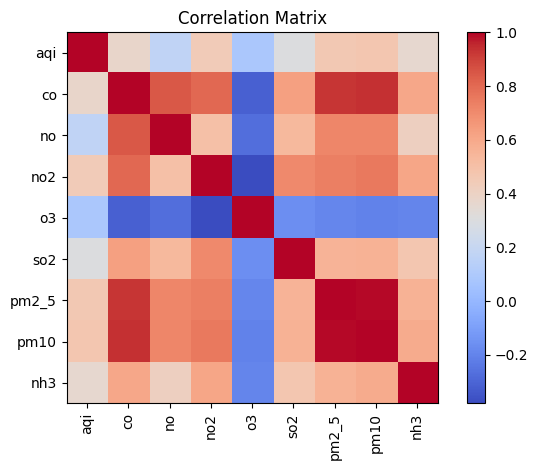

In [ ]:
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Modeling and Analysis

### Split the Data

In [ ]:
from sklearn.model_selection import train_test_split

data = data.drop('city', axis=1, errors='ignore')
data = data.drop('date', axis=1, errors='ignore')

# Separate features and target
X = data.drop(columns=['aqi'])
y = data['aqi']

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (18803, 8)
Testing set shape: (4701, 8)


### Train and Test Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9306530525420124

Confusion Matrix:
 [[ 531    0    0    0    0]
 [   3  424   29    0    0]
 [   0    7  178  144    0]
 [   0    0   11  712  125]
 [   0    0    0    7 2530]]
